In [55]:
# Import libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./dataset/data.csv")

In [74]:
df.head(10)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
5,9305-CDSKC,0,8,99.65,820.50,1,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
6,1452-KIOVK,0,22,89.10,1949.40,0,True,False,True,True,...,False,True,False,False,False,False,True,True,False,False
7,6713-OKOMC,0,10,29.75,301.90,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,7892-POOKP,0,28,104.80,3046.05,1,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False
9,6388-TABGU,0,62,56.15,3487.95,0,True,False,True,True,...,False,False,False,False,True,False,False,False,False,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [60]:
# Will convert Yes/No in Churn column to binary
df['Churn'] = df['Churn'].map({
'Yes':1, 'No':0
})

In [61]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [62]:
# Convert total charges to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [63]:
# Check how many total charges are missing
df['TotalCharges'].isna().sum()

11

In [64]:
# Since low number missing I will drop it
df.dropna(subset=['TotalCharges'], inplace=True)

In [65]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [66]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [67]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

In [68]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             7032 non-null   object  
 1   SeniorCitizen                          7032 non-null   category
 2   tenure                                 7032 non-null   int64   
 3   MonthlyCharges                         7032 non-null   float64 
 4   TotalCharges                           7032 non-null   float64 
 5   Churn                                  7032 non-null   int64   
 6   gender_Male                            7032 non-null   bool    
 7   Partner_Yes                            7032 non-null   bool    
 8   Dependents_Yes                         7032 non-null   bool    
 9   PhoneService_Yes                       7032 non-null   bool    
 10  MultipleLines_No phone service         7032 non-null   bool    
 

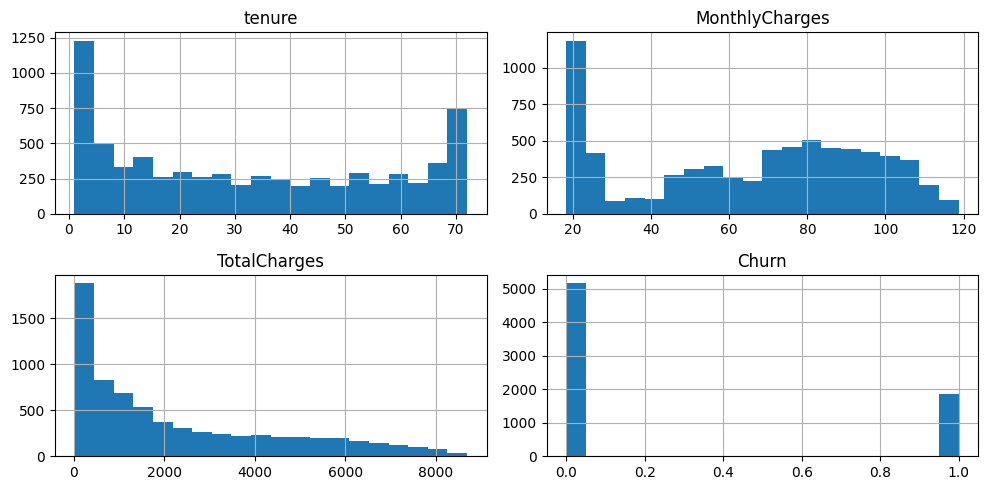

In [ ]:
# Exploring numeric columns
numeric_columns = df.select_dtypes('number').columns
df[numeric_columns].hist(bins=20, figsize=(10,5))
plt.tight_layout()
plt.show()


In [73]:
corr_with_churn = df.select_dtypes('number').corr()['Churn'].sort_values(ascending=False)
print(corr_with_churn)


Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


In [77]:
monthly_charges_by_contract = df.groupby('Contract_One year')['MonthlyCharges'].mean()
print("Average Monthly Charges by One year Contract:", monthly_charges_by_contract)

Average Monthly Charges by One year Contract: Contract_One year
False    64.723759
True     65.079416
Name: MonthlyCharges, dtype: float64
